In [25]:
from sklearn.datasets import make_regression
from sklearn import linear_model

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

In [35]:
'''
Super class for the Gradient Descent Algorithm, which gets initialized with the parameters as

iterations - the number of iterations in order to obtain the Global minimum / J(0) / Minimized cost function
alpha - learning rate to follow while performing the descend
scale [defaulted to False], if set to True this will scale the X with the help of mean and standard deviation
verbose [defaulted to False], if set to True this will log details to the console.
'''


class BGDRegression:
    def __init__(self,
                 iterations,
                 alpha=0.001,
                 scale=False,
                 verbose=False,
                 plot=False):
        self._iterations = iterations
        self._theta = None
        self._cost_history = None
        self._alpha = alpha
        self._verbose = verbose

    '''
        Sets the model parametes[theta] using the gradient descent algorithm
    '''
    def generate_model(self, X, y):

        # Add feature_0 which is 1 always to the features matrix
        X = np.insert(X, 0, 1, axis=1)

        #Initialize Theta with the number of columns and inclusion of Theat_0
        self._theta = np.matrix(np.zeros(X.shape[1]).T)

        # Temp matrix to preserve theta during the iterations
        temp = np.matrix(np.zeros(self._theta.shape))
        features = int(self._theta.ravel().shape[1])

        # Initiate the cost history to store during the iterations
        self._cost_history = np.zeros(self._iterations)

        for i in range(iterations):
            error = self.loss_function(X, y)

            for j in range(features):
                #Calculate the graident
                term = np.multiply(error, X[:, j])
                temp[0, j] = self._theta[0, j] - (
                    (self._alpha / len(X)) * np.sum(term))

            self._theta = temp
            self._cost_history[i] = self.cost_function(X, y)
        return self._theta, self._cost_history

    '''
        //TODO not required as there is already method exists
        y = h(x) or f(x) = x1.theta_1 + x2.theta_2 + .... x_m.theta_m
    '''
    def predict(self, X):
        return self.hypothesis(X)

    '''
        Mean Absolute Error = 1/m * sum of all(|pred - y|)
    '''
    def mae(self, X, y):
        pred = self.hypothesis(X)
        mae = (1.0 / len(yhat_m)) * np.sum(np.abs(pred - y))
        return mae

    '''
       Mean Square Error = 1/2 * m sum of all((pred - y)^2)
       where m is the population size
    '''
    def mse(self, X, y):
        pred = self.hypothesis(X)
        mse = (1 / (2 * len(X))) * np.sum(np.square(pred - y))
        return mse

    '''
        Cost j(theta) = 1/2 m * (sigma h(theta) - y )^2
    '''
    def cost_function(self, X, y):
        return np.sum(np.power(self.loss_function(X, y), 2)) / (2 * len(X))

    '''
        Hypothesis h(x) or f(x) = X * Transpose(theta), where theta is the model parameters
    '''
    def hypothesis(self, X):
        return (X * self._theta.T)

    '''
        Loss Function : Predicted Value - Actual Value
    '''
    def loss_function(self, X, y):
        return self.hypothesis(X) - y
    

In [27]:
DATA_NUM = 1000

In [28]:
def generate_linear_regression_problem(samples_num):
    """Function that uses 'make_regression' of sklearn as a core. It's purpose it to 
    generate point that can be aproximated by linear function. Returns tuple of data 
    and it's labels.
    
    Arguments:
    ---------
    samples_num: int
        Numer of points that should be generated.
    """
    bias = np.random.uniform(-5, 5)
    data_noise = np.random.uniform(4, 8)
    x_values, y_values = make_regression(n_samples=samples_num, n_features=1, noise=data_noise, 
                                         bias=bias)
    
    return x_values, y_values.reshape(-1, 1)

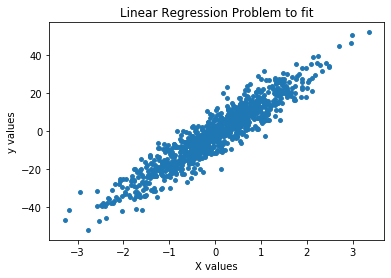

In [34]:
# Generating values 'X' and labels 'y'
X, y = generate_linear_regression_problem(DATA_NUM)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Linear Regression Problem to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

In [38]:
iterations = 10000

In [39]:
linear_regression_model = BGDRegression(iterations, scale=True, verbose=True)
linear_regression_model.generate_model(np.matrix(X), np.matrix(y))
print(linear_regression_model._theta)

[[-1.220168 15.158461]]


In [40]:
print(linear_regression_model.mse(np.insert(np.matrix(X), 0, 1, axis=1), np.matrix(y)))

16.153787654165345


Text(0, 0.5, '$J(0)$')

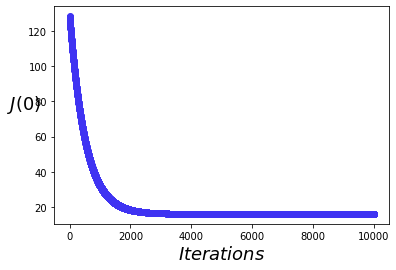

In [41]:
# Random Color generation function used during plotting
def get_color():
    return np.random.rand(3, )

plt.scatter(range(iterations), linear_regression_model._cost_history, color=get_color(), label='J(0)')
plt.xlabel("$Iterations$", fontsize=18)
plt.ylabel("$J(0)$", rotation=0, fontsize=18)

In [42]:
from sklearn.metrics import r2_score
print("R^2 : ", r2_score(y, linear_regression_model.predict(np.insert(np.matrix(X), 0, 1, axis=1))))

R^2 :  0.8725615752931121
